In [42]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# logisticregression 

In [3]:
#데이터 셋 부르는 방법 (1)
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data) #값들만 뽑음

# 아이리스 데이터프레임 만들기
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data)
iris_df.columns = [x[:-5].replace(' ', '_') for x in iris.feature_names]
iris_df['species'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# x and y split; 
y = iris_df.species
x = iris_df.drop('species', axis=1)
x
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [12]:
#train and test split [7:3]으로 나눔  >> 순서! 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y                                                 , test_size=.3 #테스트데이터 사이즈 지정
                                                    , random_state=3 #random 고정 
                                                    )
x_train

,sepal_length,sepal_width,petal_length,petal_width
51,6.4,3.2,4.5,1.5
23,5.1,3.3,1.7,0.5
83,6.0,2.7,5.1,1.6
142,5.8,2.7,5.1,1.9
84,5.4,3.0,4.5,1.5
...,...,...,...,...
107,7.3,2.9,6.3,1.8
21,5.1,3.7,1.5,0.4
0,5.1,3.5,1.4,0.2
131,7.9,3.8,6.4,2.0


In [13]:
#7:3으로 잘 나뉘어졌는지 확인 
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))


105 45
105 45


In [15]:
#logistic regression ; 데이터 학습 
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=200) #연산 횟수를 늘려 '수렴'값이 나오도록'? 
log_model.fit(x_train, y_train)#훈련 데이터로 학습 

LogisticRegression(max_iter=200)

In [51]:
#데이터 검증; 정확도 평가 
log_model.score(x_test, y_test)

0.9777777777777777

In [52]:
#test-data에 대해서 정확도 시뮬레이션; 교차검증
from sklearn.model_selection import cross_val_score
log_cv = cross_val_score(log_model, x_test, y_test, cv=5, scoring='accuracy') #cv: 검증 횟수 조정
#현재 데이터 묶음 작기때문에 cv: cross value를 할때 특정횟수 이상이면 중복이됨으로 cv목적 상실
log_cv.mean()

0.9555555555555555

In [18]:
#데이터 셋 부르는 방법 (2)> 함수만 호출하고 싶을때
#from sklearn.datasets  import load_iris()
#load_iris()

# decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, )
dt.fit(x_train,y_train) #훈련 데이터로 학습

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
dt.score(x_test, y_test) #검증 데이터로 정확도 평가

0.9111111111111111

In [28]:
#정확도로 평가 ; 검증데이터 출력값 <-> 검증데이터 y값 직접비교; 
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
#y_test.head(), y_pred 
accuracy_score(y_test, y_pred)

0.9111111111111111

In [50]:
#교차검증으로 평가 
from sklearn.model_selection import cross_val_score
dt_cv = cross_val_score(dt, x_test, y_test, cv=5, scoring='accuracy')
dt_cv.mean()

0.9555555555555555

In [30]:
#크리켓 예제 ('범주' 데이터 문제)
#total: 30 , 15명 >> 크리켓 player 찾기 
#(성별, 반, 키): 분류 기준 

In [31]:
#!pip install pydotplus

In [33]:
# decision tree with 3 depth 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3) #
dt.fit(x_train, y_train) #훈련데이터로 학습

DecisionTreeClassifier(max_depth=3)

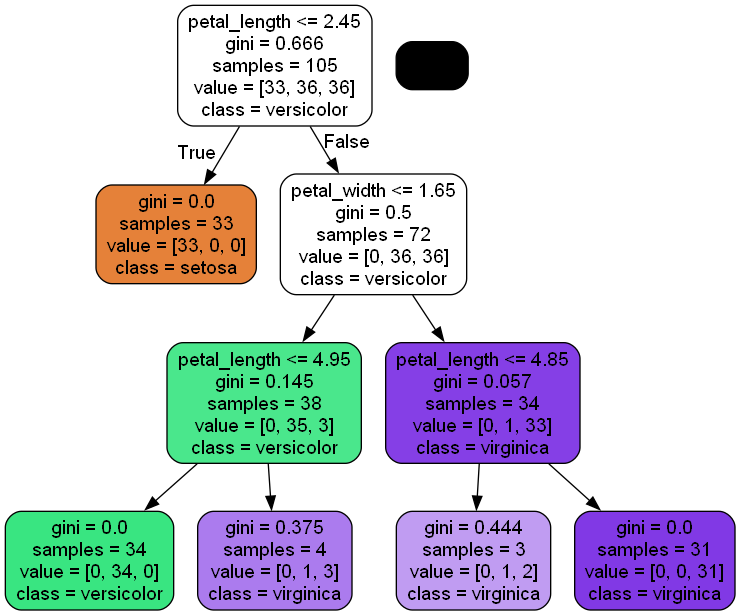

In [34]:
# 파라미터 변경
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=iris_df.columns[:4], #변수이름 변경
                                class_names=iris.target_names, 
                                filled=True, #칼라로 채우기
                                rounded=True) #둥근 테두리
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [35]:
#graph 저장
graph.write_pdf('iris.pdf')
graph.write_png('iris.png')

True

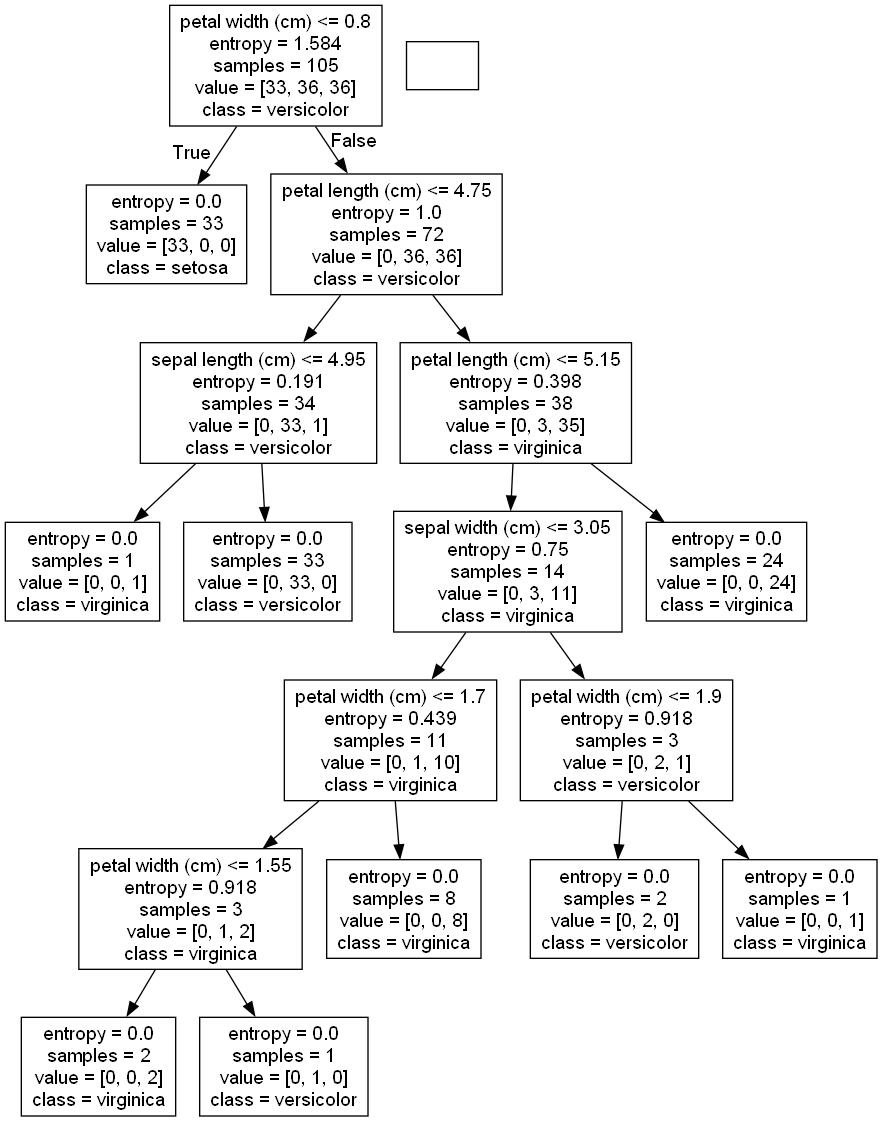

In [32]:
# 의사결정트리 시각화
from IPython.display import Image  
from sklearn import tree
import pydotplus
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=iris.feature_names,                                class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [37]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [38]:
rf.score(x_test, y_test)

0.9777777777777777

In [49]:
rf_cv = cross_val_score(rf, x_test, y_test, cv=5, scoring='accuracy')
rf_cv.mean()

0.9555555555555555

In [41]:
rf_cv

array([1.        , 1.        , 1.        , 0.88888889, 0.88888889])

In [53]:
# MODEL COMPARISON
cv_df = pd.DataFrame({
    'LOG': log_cv,
    'DT': dt_cv,
    'RF': rf_cv
})
cv_df

,LOG,DT,RF
0,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000
2,0.888889,1.000000,1.000000
3,1.000000,0.888889,0.888889
4,0.888889,0.888889,0.888889


In [54]:
#교차검증 평균, 표준편차 비교 >> 
summary_df = pd.DataFrame({
    'MEAN': cv_df.mean(),
    'STD': cv_df.std()  
})
print('Comparison')
print(summary_df) #정확도의 평균을 비교하여 어떤 분류법이 더 효과적인지 비교할수 있음;

Comparison
         MEAN       STD
LOG  0.955556  0.060858
DT   0.955556  0.060858
RF   0.955556  0.060858


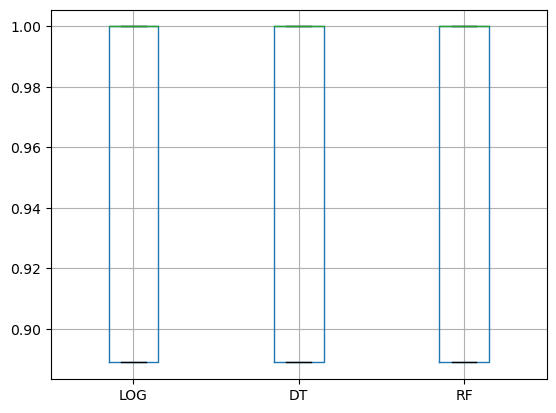

In [55]:
#박스플랏
cv_df.boxplot()
plt.show()

In [56]:
rf.feature_importances_,x_train.columns #각 컬럼의 결과 도출의 중요도 

(array([0.13015225, 0.02783413, 0.43909964, 0.40291397]),
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object'))

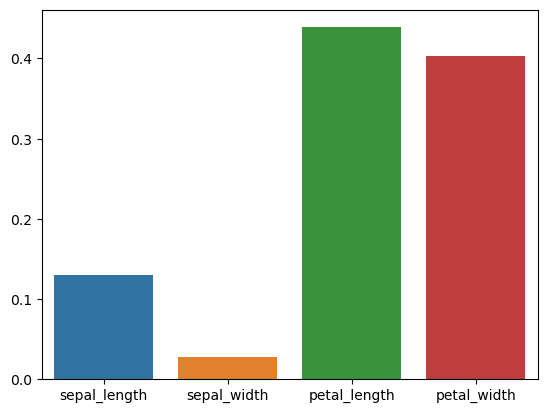

In [58]:
#시각화 >> 정렬 되어있지 않음
sns.barplot(x=x_train.columns,y=rf.feature_importances_)
plt.show()

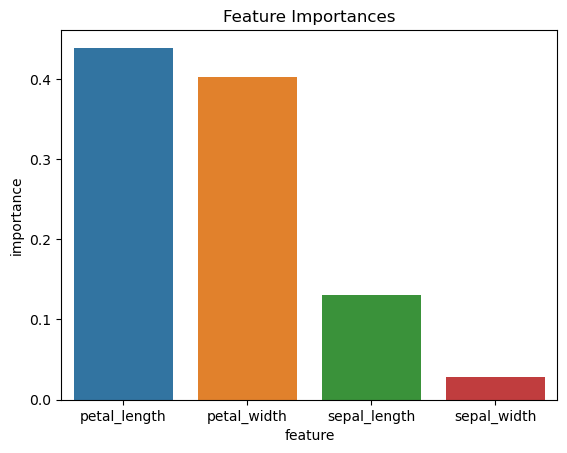

In [59]:
#정렬 시키기 ; 데이터 시각화를 통해서 정렬 뿐만 아니라 dataframe으로 만들어졌기 때문에 데이터 가공을 통해 특정데이터의 추출및 변경이 가능
imp_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance':rf.feature_importances_
})
imp_df = imp_df.sort_values('importance', ascending=False)

sns.barplot(data=imp_df, x='feature', y='importance')
plt.title('Feature Importances')
plt.show()

In [61]:
#실제 예측 	sepal_length	sepal_width	petal_length	petal_width
x_train 
test_data = pd.DataFrame({
    'sepal_length': 4,
    'sepal_width': 3,
    'petal_length': 6,
    'petal_width': 1.5
    
}, index=[0])
test_data

,sepal_length,sepal_width,petal_length,petal_width
0,4,3,6,1.5


In [62]:
#테스트 데이터로 예측 >> 범주가 숫자형으로 출력
log_model.predict(test_data)[0]

2

In [63]:
#iris 꽃 이름으로 변환
iris.target_names[log_model.predict(test_data)[0]]

'virginica'

# scaling

In [64]:
input_data = np.array([[3, -1.5, 3, -6.4],
                       [0, 3, -1.3, 4.1],
                       [1, 2.3, -2.9, -4.3]])
input_data

array([[ 3. , -1.5,  3. , -6.4],
       [ 0. ,  3. , -1.3,  4.1],
       [ 1. ,  2.3, -2.9, -4.3]])

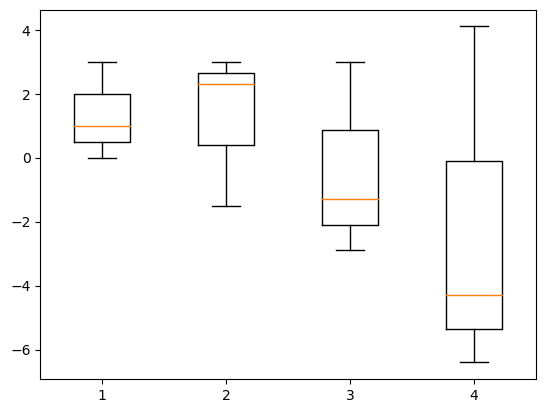

In [65]:
#박스플랏으로 데이터 분포 파악
plt.boxplot(input_data)
plt.show()

In [66]:
#min max scaler
from sklearn.preprocessing import MinMaxScaler
#column 기준으로 해당 열에 Max, Min값을 기준으로 범주 나눔
#치우쳐 지는 것을 최소화 
scaler = MinMaxScaler()
input_data_scaled = scaler.fit_transform(input_data)
input_data_scaled

array([[1.        , 0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.27118644, 1.        ],
       [0.33333333, 0.84444444, 0.        , 0.2       ]])

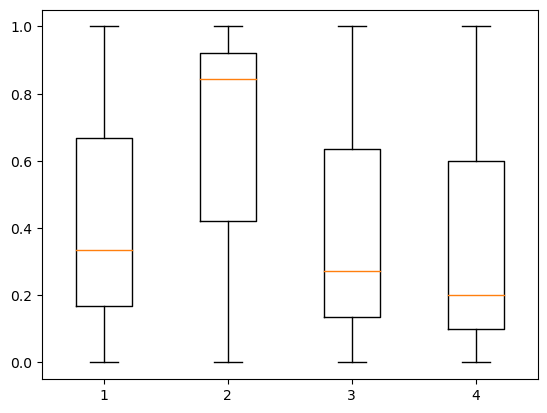

In [67]:
#박스플랏으로 시각화 
plt.boxplot(input_data_scaled)
plt.show()

In [68]:
# STANDARD SCALER
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_data_scaled = scaler.fit_transform(input_data)
input_data_scaled

array([[ 1.33630621, -1.39936232,  1.36473933, -0.9258201 ],
       [-1.06904497,  0.87670892, -0.36125453,  1.38873015],
       [-0.26726124,  0.5226534 , -1.0034848 , -0.46291005]])

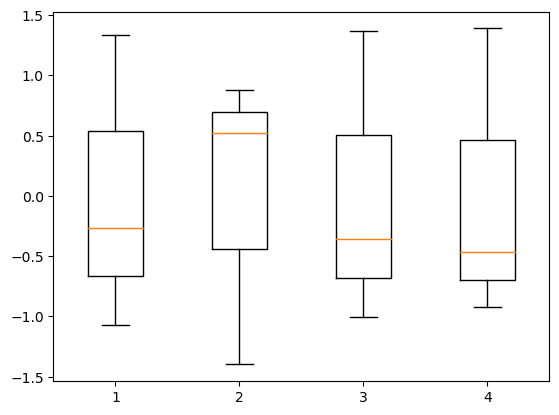

In [69]:
#scaling 후 박스플랏
plt.boxplot(input_data_scaled)
plt.show()

In [70]:
from sklearn.preprocessing import scale #standard scaler와 같은 결과
input_data_scaled = scale(input_data)
input_data_scaled

array([[ 1.33630621, -1.39936232,  1.36473933, -0.9258201 ],
       [-1.06904497,  0.87670892, -0.36125453,  1.38873015],
       [-0.26726124,  0.5226534 , -1.0034848 , -0.46291005]])

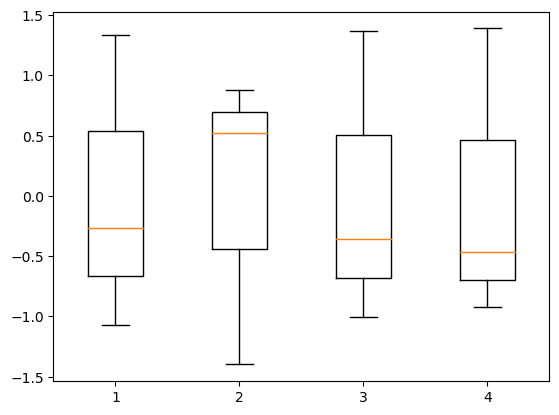

In [71]:
# SCALING한 후 박스플랏으로 확인
plt.boxplot(input_data_scaled)
plt.show()

In [72]:
from sklearn.preprocessing import normalize, Normalizer
scaler = Normalizer()
input_data_scaled = scaler.fit_transform(input_data)
input_data_scaled

array([[ 0.38345117, -0.19172558,  0.38345117, -0.81802916],
       [ 0.        ,  0.57207755, -0.24790027,  0.78183932],
       [ 0.17357868,  0.39923096, -0.50337816, -0.74638831]])

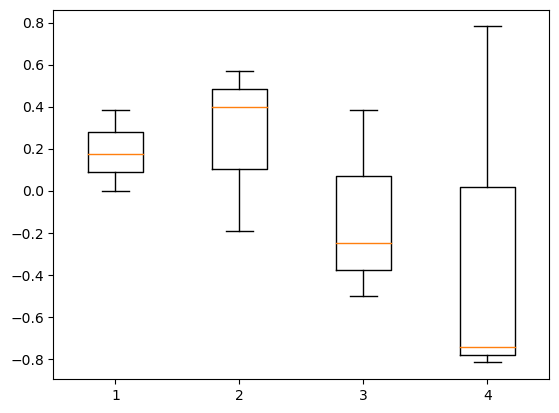

In [73]:
# SCALING한 후 박스플랏으로 확인
plt.boxplot(input_data_scaled)
plt.show()

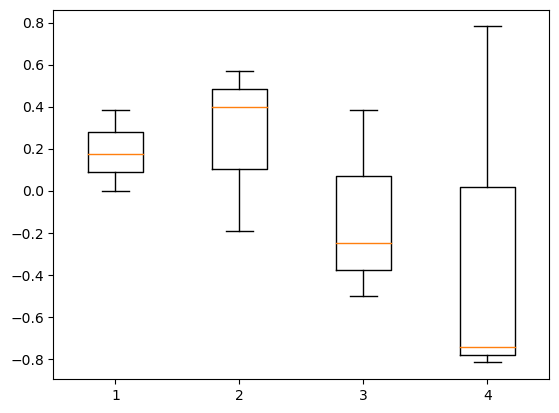

In [74]:
input_data_scaled = normalize(input_data, norm='l2')
input_data_scaled
# SCALING한 후 박스플랏으로 확인
plt.boxplot(input_data_scaled)
plt.show()

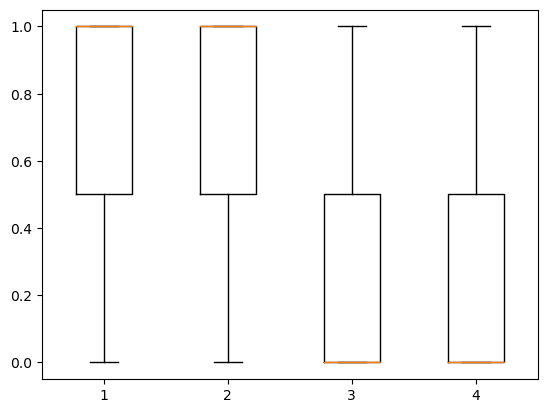

In [75]:
# BINARIZER로 SCALING
from sklearn.preprocessing import Binarizer
input_data_scaled = Binarizer().transform(input_data)
input_data_scaled
# SCALING한 후 박스플랏으로 확인
plt.boxplot(input_data_scaled)
plt.show()

# Resample

In [ ]:
sns.countplot() #갯수 맞는지 확인 
sns.countplot(x=y_rus)
plt.show()

In [80]:
import imblearn

In [81]:
# 언더 샘플링; 갯수 줄여주기 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)

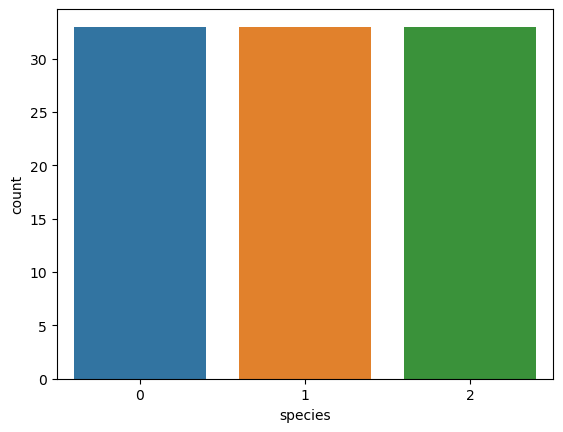

In [82]:
#언더샘플링 후 갯수가 맞는지 확인
sns.countplot(x=y_rus) 
plt.show()

In [85]:
# 오버샘플링; 갯수 늘려주기 
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_train, y_train)

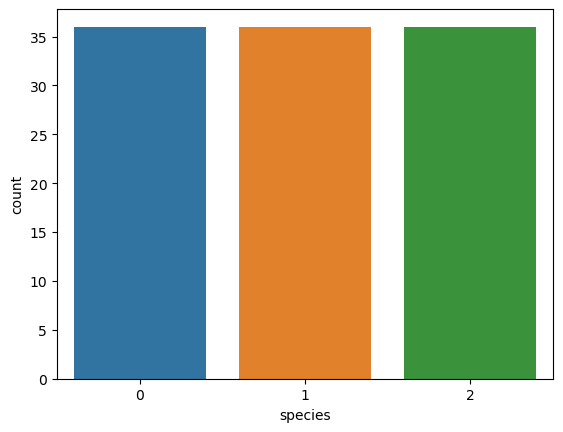

In [86]:
# 오버샘플링 후 갯수가 맞는지 확인
sns.countplot(x=y_ros) 
plt.show()

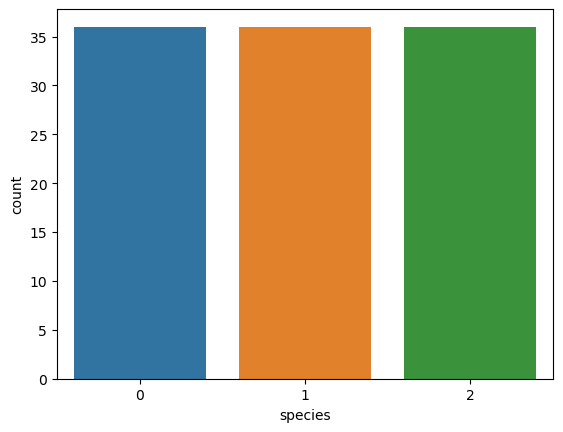

In [87]:
# 합성해서 오버샘플링
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)
# 오버샘플링 후 갯수가 맞는지 확인
sns.countplot(x=y_ros) 
plt.show()

# 데이터 model 생성 예제 

In [94]:
#당뇨병 문제; 
import os
os.chdir('C:\\Users\\jangs\\archive') 
pima = pd.read_csv('pima-indians-diabetes.csv', header=None)#header=None; column이 없는 경우 데이터가 column자리 들어가는것을 막음
pima.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
#결측치 확인
pima.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [106]:
pima.dtypes #class는 범주형 데이터

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [100]:
#데이터 프레임 요약 >> resample이 필요한 데이터임을 확인
#데이터 크기 맞지않아 model 생성시 안정성을 위해 조정이 필요
pima.describe()
pima.shape #(768, 9)
pima.groupby('class').size() #데이터 분류;

class
0    500
1    268
dtype: int64

In [103]:
pima.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


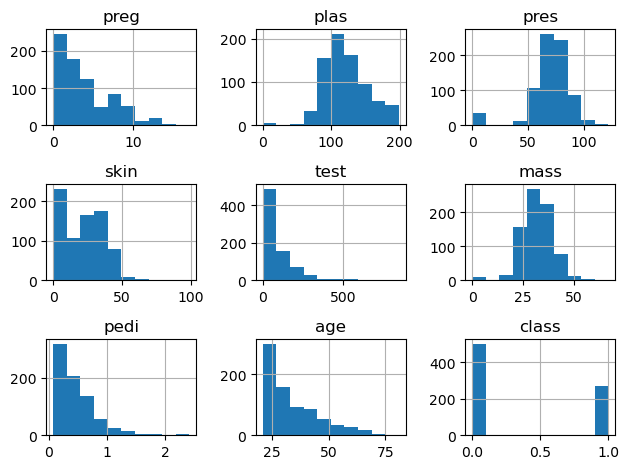

In [110]:
pima.hist()
plt.tight_layout() #plot 배치가 최적화 되도록하는 함수   
plt.show()

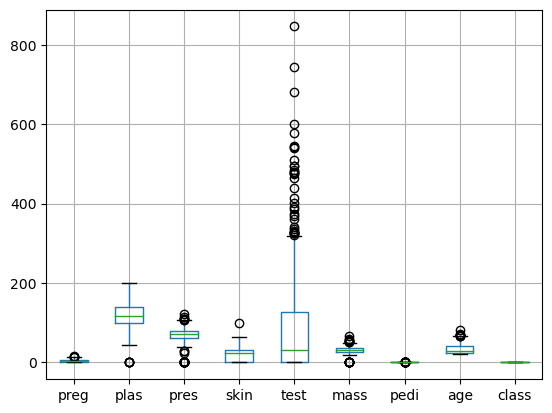

In [101]:
#시각화 
#히스토그램, 박스플랏을 이용한 일변량분석
pima.boxplot() #>> 범위차이가 많이 발생하는 것을 통해, scailing 여부 확인가능
#해당데이터는 '혈청 인슐린(test)데이더가 편향된 범위를 가지고 있으므로 크기 조정이 필요함을 확인'
plt.show()

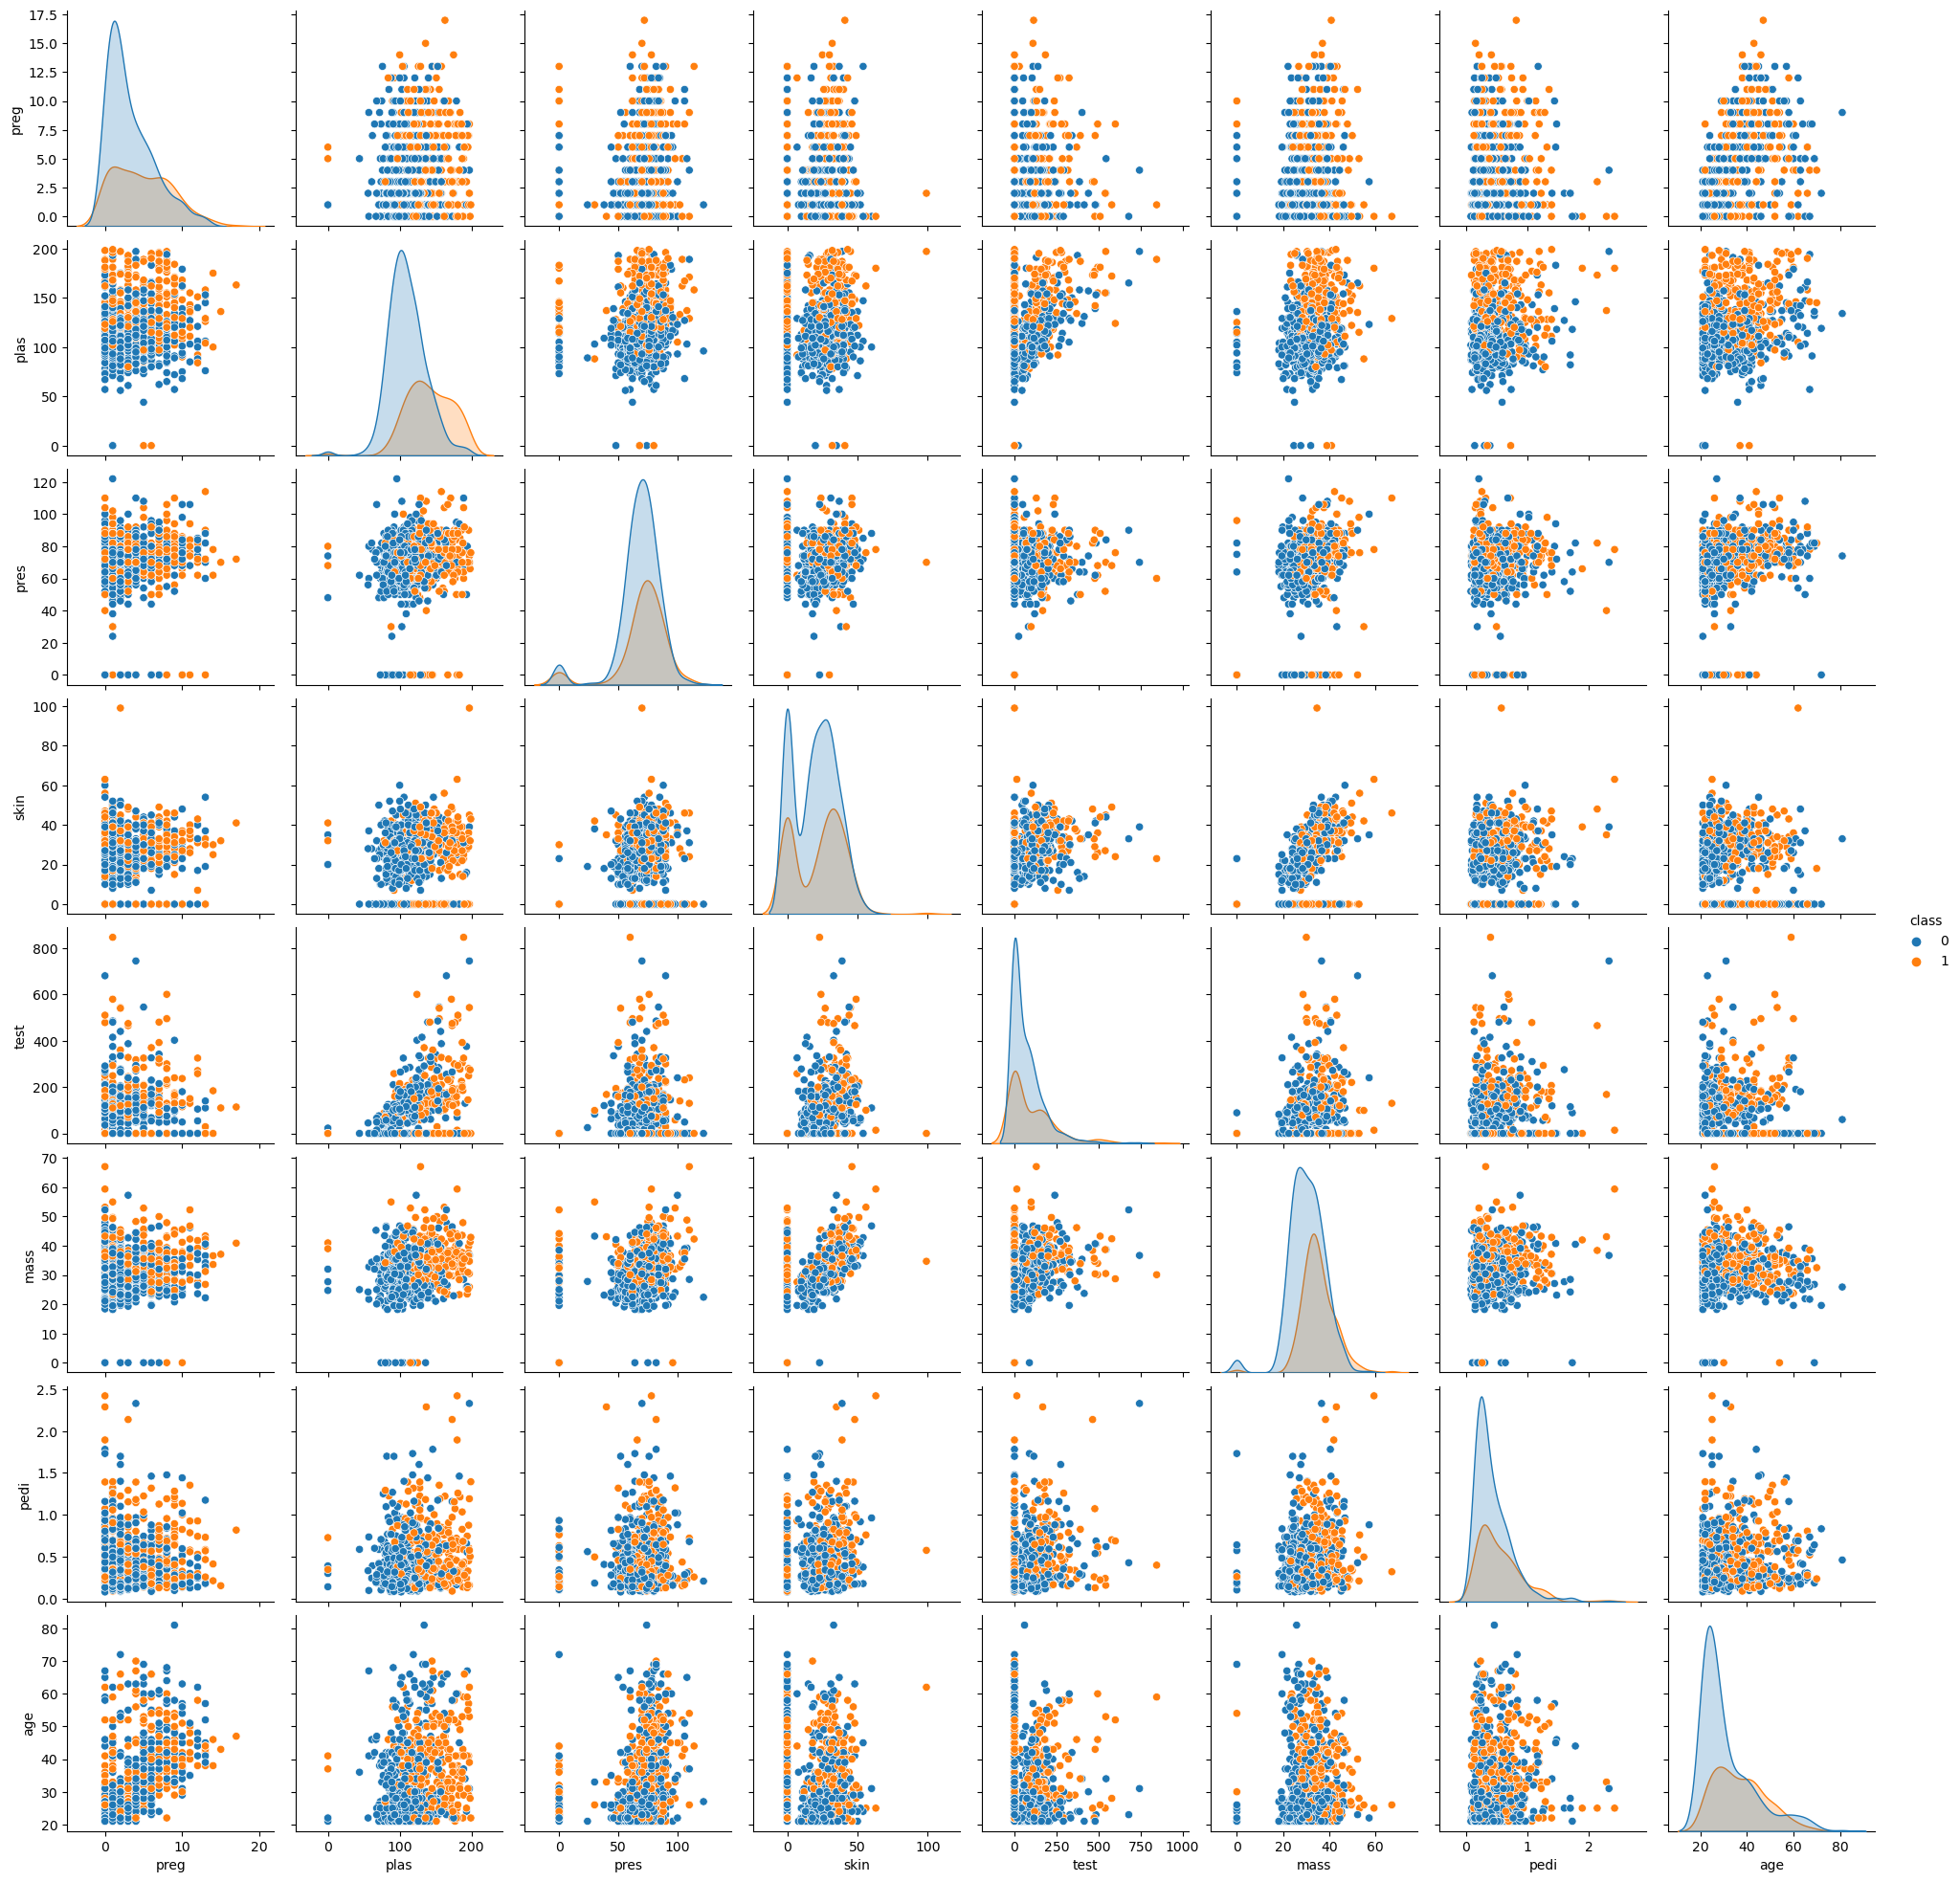

In [112]:
#산점도 ; 2 그래프의 모양이 확연하게 다른것이 구별이 좋은 함수라는 것을 ? 알수있음
# 그래프 모양이 완전히 다른 범위에 분포가 되어있을수록 분류가 쉬움
# >> 명확하게 비교 집단의 특성이 구별된다는 것을 의미, gini, entropy가 낮은 데이터들의 분류가 가능함.? 
sns.pairplot(pima, hue='class')
plt.show()

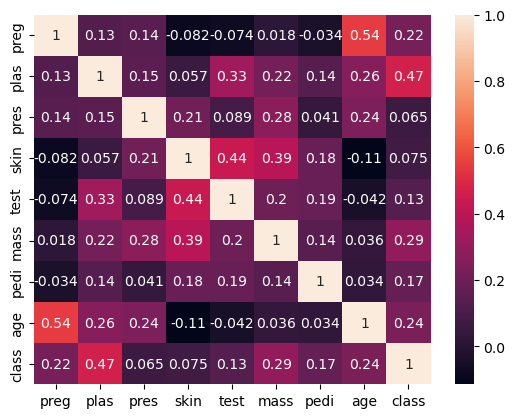

In [113]:
# 히트맵; 데이터간의 상관관계 (기준: 0.7~1.0 가까울수록 / 양의 상관관계, 0.0: 관련성이 없음/ -1.0: 음의 상관관계/역관계)
#독립변수들간의 관계; >. plas가 class를 예측하는데 중요한 변수가 될수있음
sns.heatmap(pima.corr(), annot=True)
plt.show()

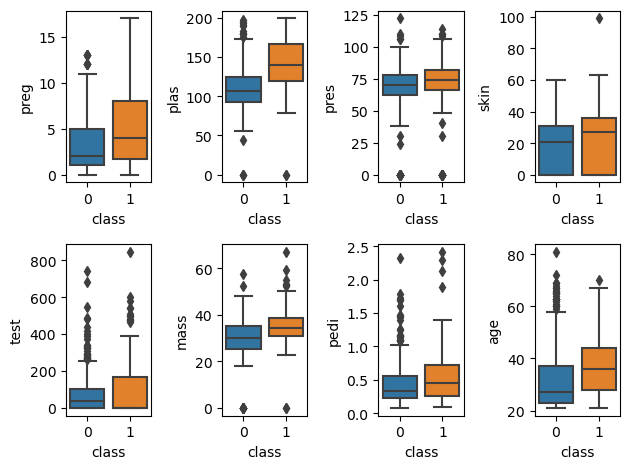

In [119]:
#박스플랏 
for i in range(8):
    plt.subplot(2,4,i+1) #영역 나누기; 
    sns.boxplot(data=pima, x='class',y=pima.columns[i])
plt.tight_layout() #최적화 
plt.show()

In [131]:
# x and y split. 독립변수, 종속변수 분리
y = pima['class']
x = pima.drop('class', axis=1)

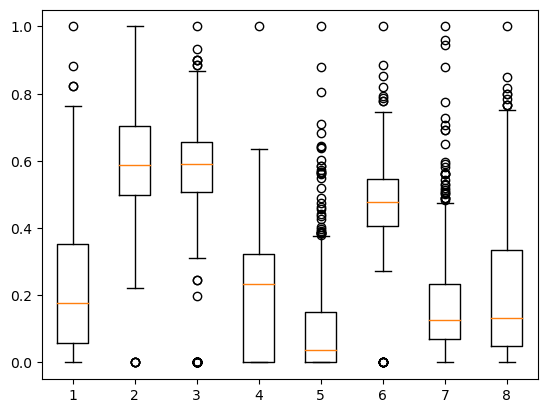

In [134]:
# 스케일한 후 박스플랏으로 확인; [길이 조정: 크기를 편향을 맞음]
x_scaled = scaler.fit_transform(x)

plt.boxplot(x_scaled)
plt.show()

In [135]:
# Train and test split (test size=.2). 훈련, 테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.2, random_state=1)

In [137]:
pima.groupby('class').size()

class
0    500
1    268
dtype: int64

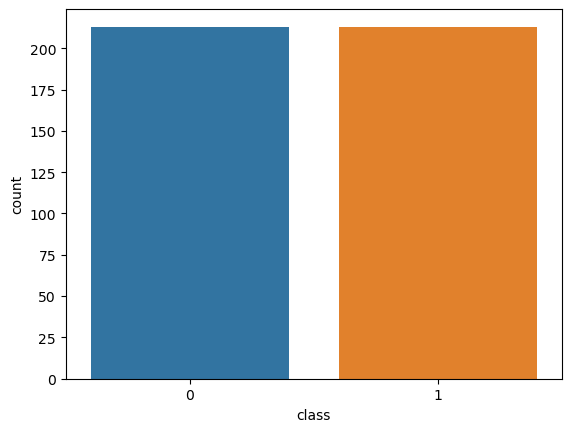

In [136]:
# 훈련데이터 언더샘플링 (데이터 줄이기; 적은 데이터 갯수에 맞추기)
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)

sns.countplot(x=y_rus) #갯수가 맞춰졌는지 확인 
#why; 데이터 학습시킬때 편향된 데이터를 학습시킨다면 예륵되는 결과에 대해서 편향된 풀력이 나올 확률이 크며, 해당 데이터에 대한 신뢰도가 떨어짐
plt.show()

In [138]:
#데이터 학습
log_model = LogisticRegression()
log_model.fit(x_rus, y_rus)


LogisticRegression()

In [139]:
#정확도 평가
log_model.score(x_test, y_test) #정확도 0.8051948051948052


0.7987012987012987

In [144]:
#교차평가
cross_val_score(log_model, x_test, y_test, cv=10, scoring='accuracy').mean()

0.7275

In [148]:
#어떤 인자의 영향을 많이 받았는지 확인; 
# 범주 데이터 DT, RF 방법과 비교 

# 반복구간 함수로 만들기 
# 로지스틱 회귀분석, 의사결정트리, 랜덤포레스트을 한꺼번에 돌리는 방법
model_lst = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
score_lst = []
cv_lst = []
for model in model_lst:
    model.fit(x_rus, y_rus)
    score_lst.append(model.score(x_test, y_test))
    cv_lst.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))

In [159]:
cv_df = pd.DataFrame(cv_lst, index=['Log', 'DT', 'RF'])
cv_df = cv_df.T #행렬 전치

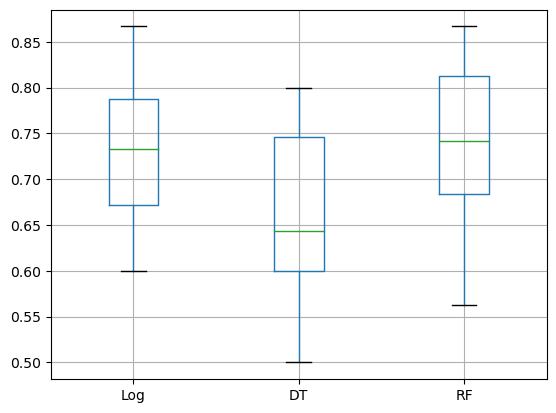

In [163]:
# 모델별로 정확도 비교하여 사용할 모델 선택
cv_df.boxplot()
plt.show()

In [161]:
#교차검증 평균, 표준편차 테이블
means = cv_df.mean()
std = cv_df.std()

std #분산: 값이 작은것을 일반적으로 선택

Log    0.084647
DT     0.102290
RF     0.105025
dtype: float64

Comparison
         MEAN       STD
Log  0.727500  0.084647
DT   0.655417  0.102290
RF   0.740417  0.105025


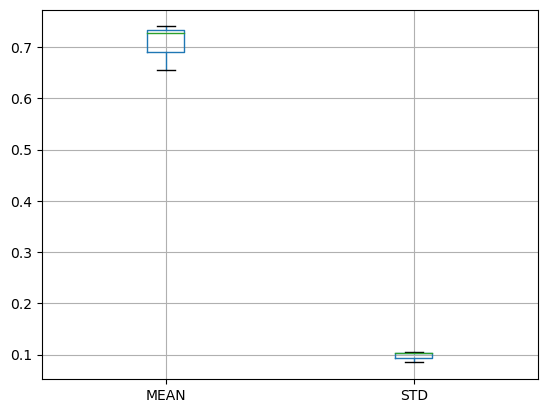

In [162]:
#교차검증 박스플랏
summary_df = pd.DataFrame({
    'MEAN': cv_df.mean(),
    'STD': cv_df.std()  
})
print('Comparison')
print(summary_df)

summary_df.boxplot()
plt.show()

In [164]:
#Random forest
rf = RandomForestClassifier()
rf.fit(x_rus,y_rus) # 최종적으로 선택한 모델로 학습

RandomForestClassifier()

In [166]:
#테스트 데이터 입력
test_data = pd.DataFrame({
    'preg':3, 'plas':120, 'pres': 34, 'skin':12, 'test':5, 'mass':22.1, 'pedi':0.375,'age': 22
}, index=[0])

In [168]:
#테스트 데이터 스케일링
test_data_scaled = scaler.transform(test_data)
rf.predict(test_data_scaled) #음성이라고 예측


#실제 데이터의 정확도 몇% 적정수준; 실제는 %가 작은값이 다반수여서 경우에 따라서 조정; 


array([0], dtype=int64)

In [171]:
#랜덤 포레스트로 변수선택 
rf.feature_importances_ #각 컬럼의 결과 도출의 중요도 

array([0.08482867, 0.25351211, 0.08676744, 0.08330766, 0.07844925,
       0.16729138, 0.11302957, 0.13281392])

# importance로 확인 가중치 있는 데이터만을 선별한 데이터로만 model 생성
# 더 적은 데이터로 동일한 효과를 낼수있다는 것을 이야기

In [180]:
# 4개 값만을 이용한 model 만들기
y = pima['class']
x = pima.drop(pima.columns[4:], axis=1)# 다른 컬럼 자르기


,preg,plas,pres,skin
0,6,148,72,35
1,1,85,66,29
2,8,183,64,0
3,1,89,66,23
4,0,137,40,35
...,...,...,...,...
763,10,101,76,48
764,2,122,70,27
765,5,121,72,23
766,1,126,60,0


In [181]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.2, random_state=1)

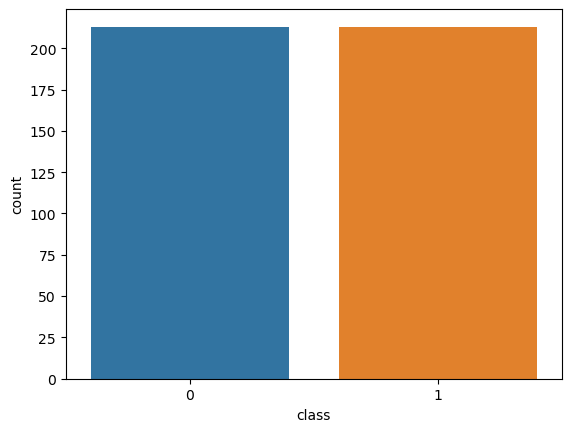

In [182]:
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_train, y_train)

sns.countplot(x=y_rus) #갯수가 맞춰졌는지 확인 
#why; 데이터 학습시킬때 편향된 데이터를 학습시킨다면 예륵되는 결과에 대해서 편향된 풀력이 나올 확률이 크며, 해당 데이터에 대한 신뢰도가 떨어짐
plt.show()

In [183]:
#데이터 학습
log_model = LogisticRegression()
log_model.fit(x_rus, y_rus)

LogisticRegression()

In [184]:
log_model.score(x_test, y_test)

0.7922077922077922

In [185]:
cross_val_score(log_model, x_test, y_test, cv=10, scoring='accuracy').mean()

0.7275

In [186]:
model_lst = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
score_lst = []
cv_lst = []
for model in model_lst:
    model.fit(x_rus, y_rus)
    score_lst.append(model.score(x_test, y_test))
    cv_lst.append(cross_val_score(model, x_test, y_test, cv=10, scoring='accuracy'))

In [188]:
cv_df = pd.DataFrame(cv_lst, index=['Log', 'DT', 'RF'])
cv_df = cv_df.T #행렬 전치
cv_df.mean()

Log    0.727500
DT     0.649167
RF     0.727917
dtype: float64

In [189]:
print(pd.DataFrame({'Mean': cv_df.mean(), 'Std': cv_df.std()}))

         Mean       Std
Log  0.727500  0.084647
DT   0.649167  0.086976
RF   0.727917  0.102910


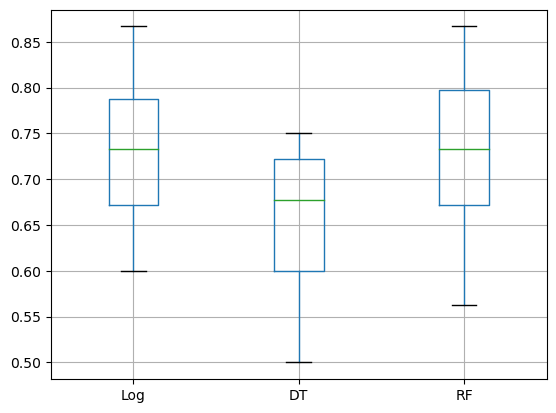

In [190]:
cv_df.boxplot()
plt.show()

# confusion Matrix : 오차율/정확도 구하기(accuracy) 

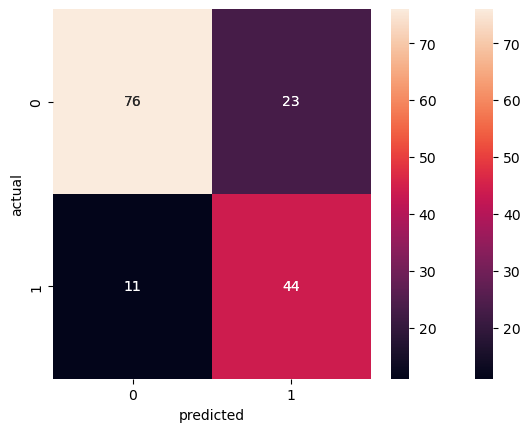

In [192]:
#model에서 결과로 나온 데이터와 test_data에 대한 실제 값의 정답률을 비교; 
#Test-data 데이타에 대한 갯수 
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [193]:
# 분류보고서
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.66      0.80      0.72        55

    accuracy                           0.78       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.80      0.78      0.78       154



In [195]:
# ROC CURVE
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf, x_test, y_test)
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\anaconda\Lib\site-packages\sklearn\metrics\__init__.py)